# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [1]:
import sys
repo_path = '/Users/adhivp/Desktop/Ersilia_tasks' #enter your repo path here
sys.path.append(repo_path)
import pandas as pd
import numpy as np
import os
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reference_library_path = os.path.join(repo_path,'data/reference_library.csv')
reference_library = pd.read_csv(reference_library_path)
reference_library.head()

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [3]:

from src.smiles_processing import standardise_smiles
smiles_list = reference_library['smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
reference_library['Standardised_smiles'] = standardised_smiles_list

[12:47:09] Can't kekulize mol.  Unkekulized atoms: 3 7


In [4]:
# use to create inchikeys
from src.convert_smiles import smiles_to_inchikey

reference_library['Inchikey'] = reference_library['smiles'].apply(smiles_to_inchikey)
reference_library.head()

,smiles,Standardised_smiles,Inchikey
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


In [5]:
#drop smiles
reference_library.drop(columns=['smiles'],inplace=True)
reference_library.head()

,Standardised_smiles,Inchikey
0,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


In [6]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

file_path = repo_path +'/data/data_processed.csv'
reference_library.to_csv(file_path,index=False)


# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [7]:
eos30gr_output_path = os.path.join(repo_path,'data/eos30gr/eos30gr_output_data.csv')
eos30gr_output = pd.read_csv(eos30gr_output_path)
eos30gr_output.head()

,key,input,activity10
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,0.347112
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,0.547030
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,0.178218
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,0.620462
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,0.623267


## Clean data , convert the data to 2 digit probabililty and removed null rows

In [8]:
eos30gr_output.dropna(inplace=True)
eos30gr_output['activity10'] = (eos30gr_output['activity10'] * 100).round(2).astype(int)
eos30gr_output

,key,input,activity10
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,34
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,54
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,17
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,62
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,62
...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,75
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,77
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,53
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,88


## Probability distribution

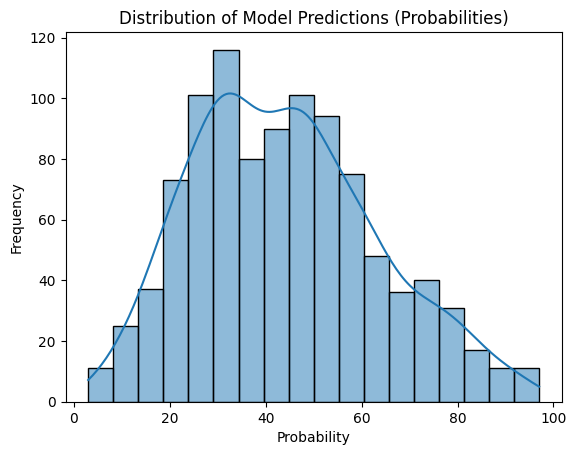

In [9]:
sns.histplot(data=eos30gr_output, x='activity10', kde=True)
plt.title('Distribution of Model Predictions (Probabilities)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


## As per the research paper the probability above 80 is treated as a hREG blocker below 80 as a non blocker hREG here is a distribution of that below

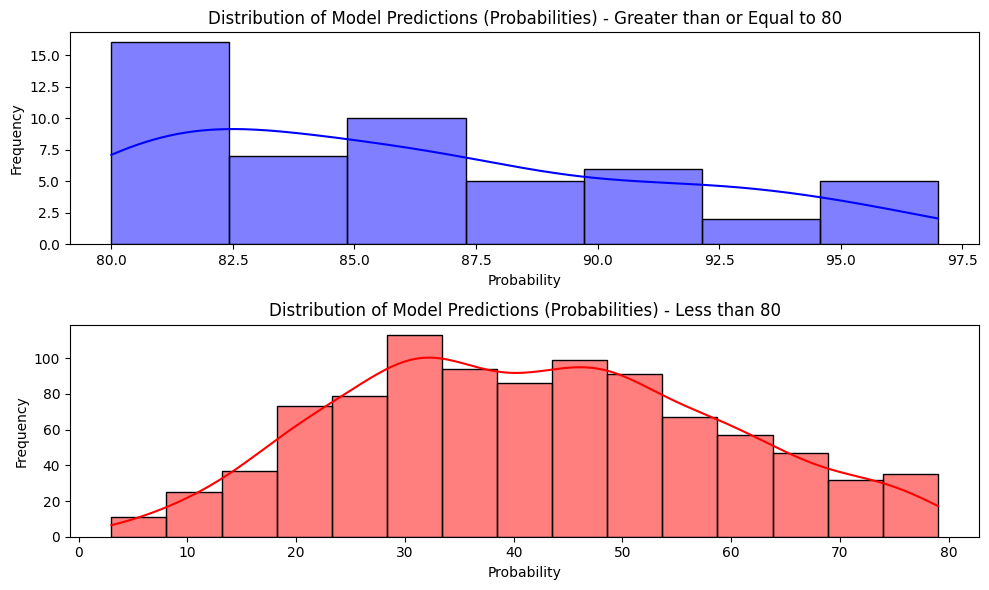

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

above_or_equal_80 = eos30gr_output[eos30gr_output['activity10'] >= 80]
below_80 = eos30gr_output[eos30gr_output['activity10'] < 80]


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  
sns.histplot(data=above_or_equal_80, x='activity10', kde=True, color='blue')
plt.title('Distribution of Model Predictions (Probabilities) - Greater than or Equal to 80')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)  
sns.histplot(data=below_80, x='activity10', kde=True, color='red')
plt.title('Distribution of Model Predictions (Probabilities) - Less than 80')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Here is a comparison in difference of both

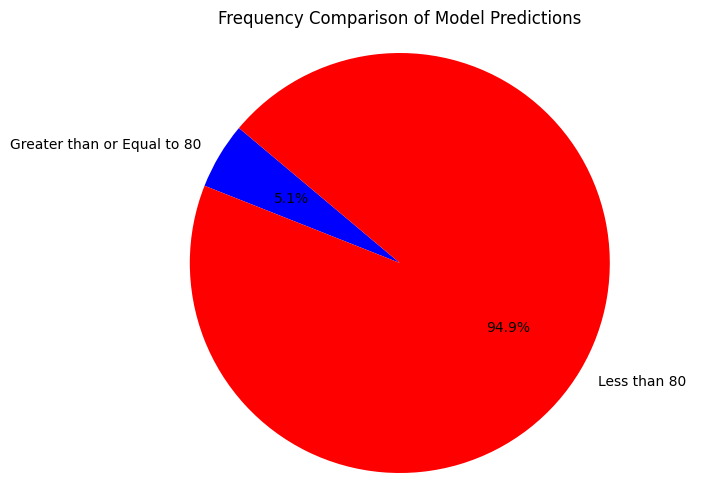

In [11]:
above_or_equal_80_count = len(eos30gr_output[eos30gr_output['activity10'] >= 80])
below_80_count = len(eos30gr_output[eos30gr_output['activity10'] < 80])

labels = ['Greater than or Equal to 80', 'Less than 80']
sizes = [above_or_equal_80_count, below_80_count]
colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency Comparison of Model Predictions')
plt.axis('equal')
plt.show()


## Chemicals with highest probabilities

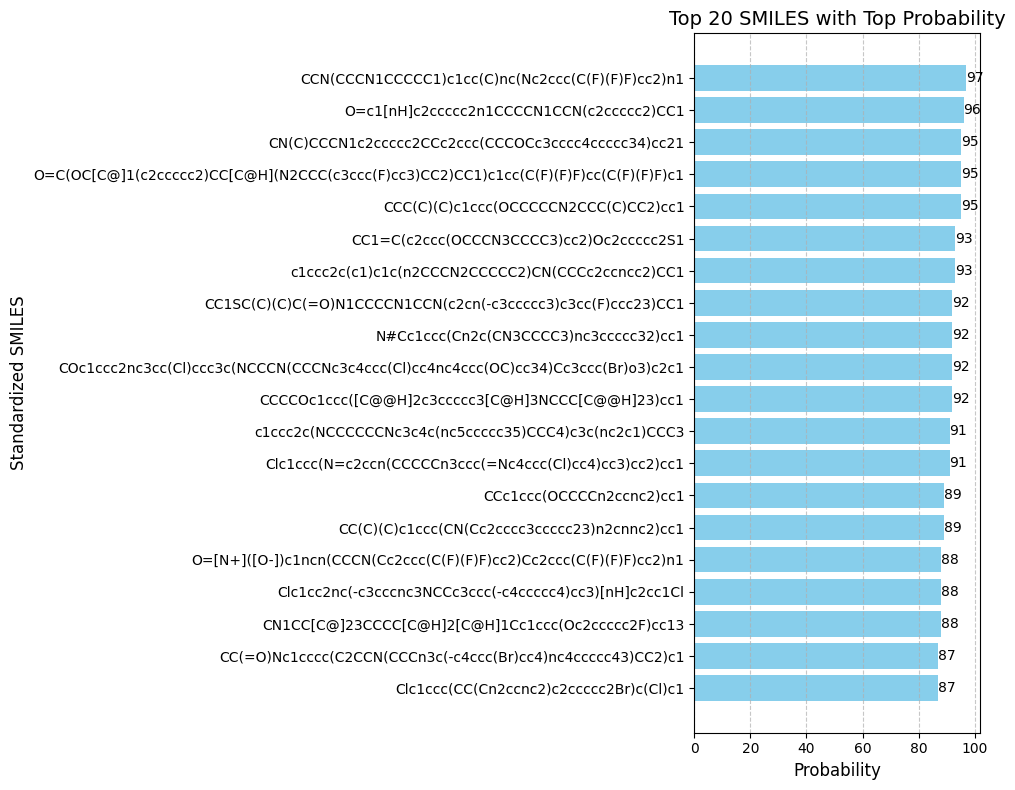

In [12]:
top_20_smiles = eos30gr_output.sort_values(by='activity10', ascending=False).head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_smiles['input'], top_20_smiles['activity10'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Probability', fontsize=12)
plt.ylabel('Standardized SMILES', fontsize=12)
plt.title('Top 20 SMILES with Top Probability', fontsize=14)
plt.gca().invert_yaxis()

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Chemicals with Lowest probablities

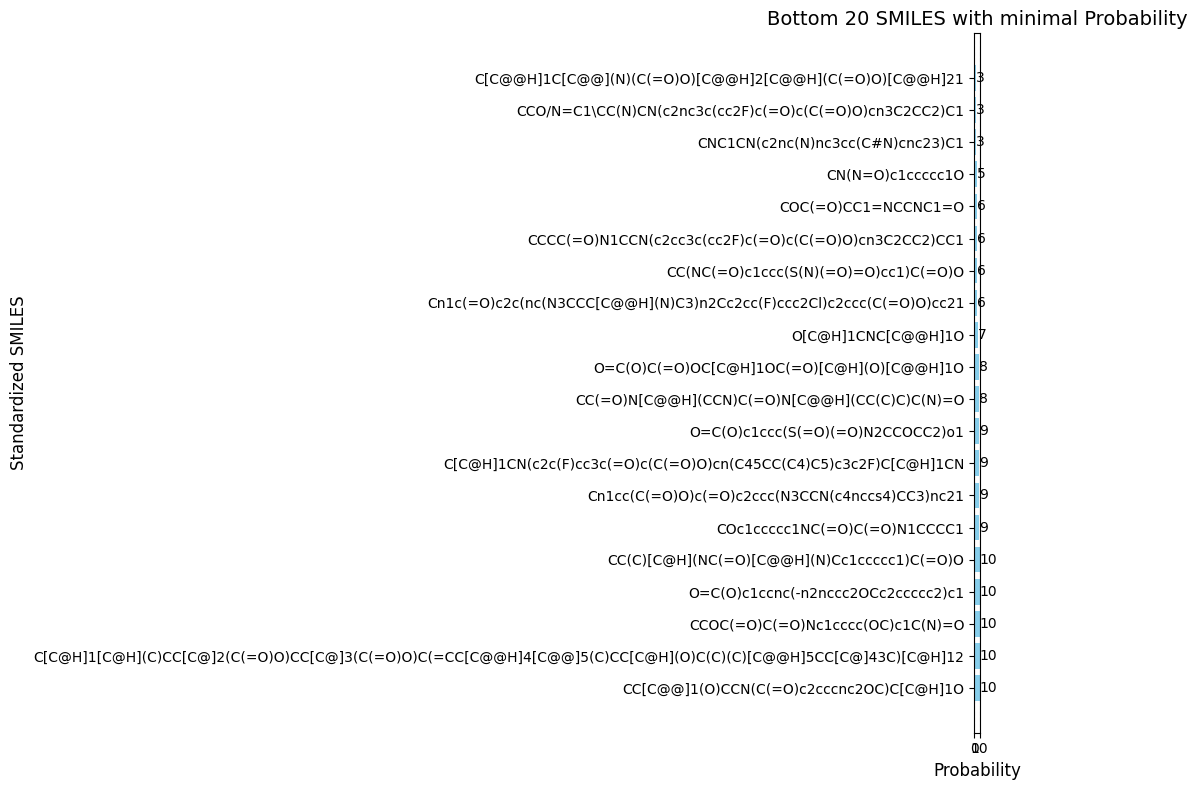

In [13]:
bottom_20_smiles = eos30gr_output.sort_values(by='activity10', ascending=True).head(20)

plt.figure(figsize=(10, 8))
bars = plt.barh(bottom_20_smiles['input'], bottom_20_smiles['activity10'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel('Probability', fontsize=12)
plt.ylabel('Standardized SMILES', fontsize=12)
plt.title('Bottom 20 SMILES with minimal Probability', fontsize=14)
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Scatter plot of predicted probabilities

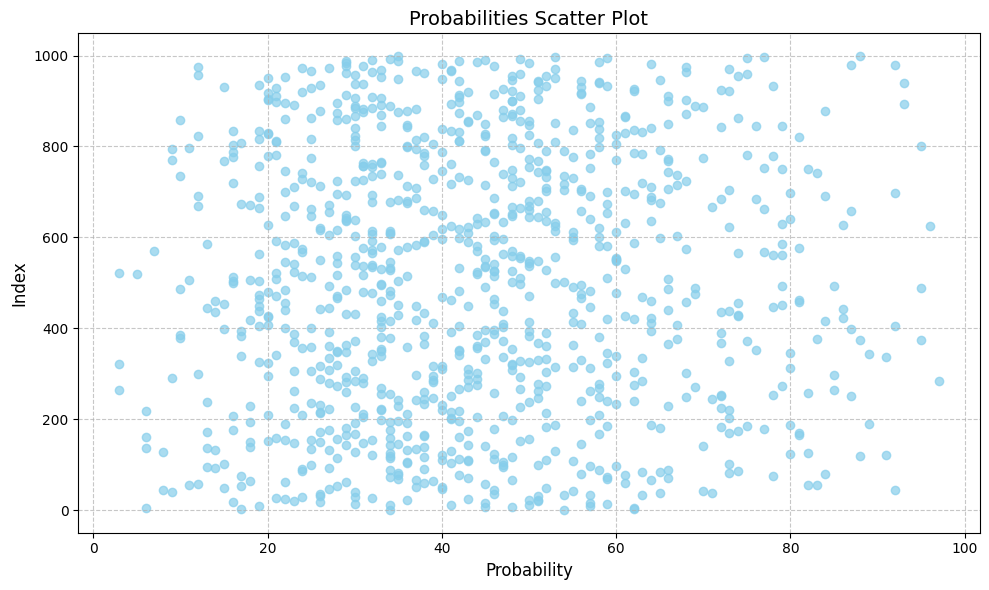

In [14]:

plt.figure(figsize=(10, 6))
plt.scatter(eos30gr_output['activity10'], eos30gr_output.index, color='skyblue', alpha=0.7) 
plt.ylabel('Index', fontsize=12)
plt.xlabel('Probability', fontsize=12)
plt.title('Probabilities Scatter Plot', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Probability distribution with ranges

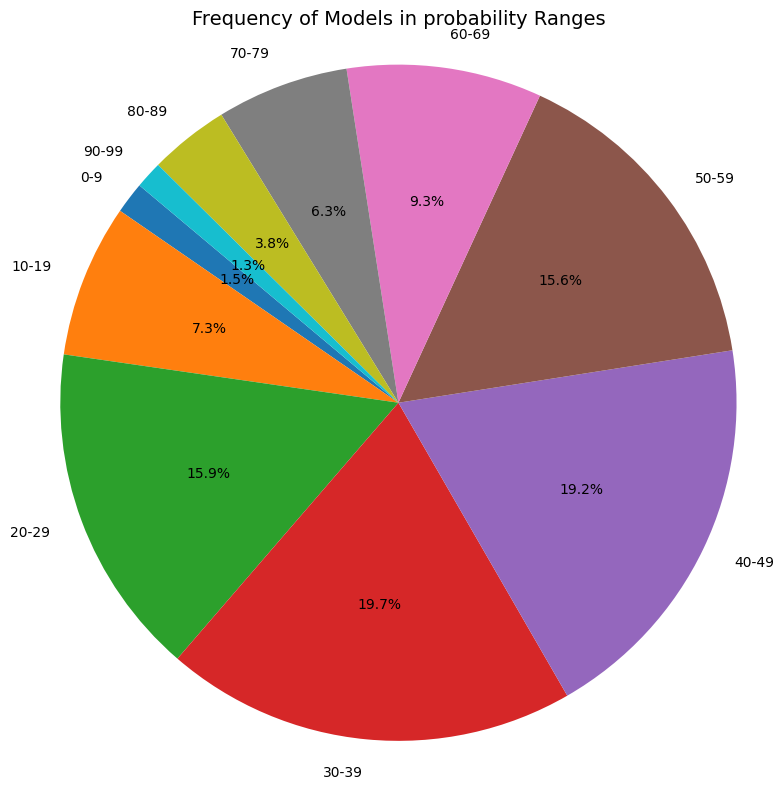

In [15]:
bins = range(0, eos30gr_output['activity10'].max() + 11, 10)  

eos30gr_output['activity10_bin'] = pd.cut(eos30gr_output['activity10'], bins=bins, right=False)

frequency = eos30gr_output['activity10_bin'].value_counts().sort_index()

labels = [f'{bin.left}-{bin.right-1}' for bin in frequency.index]

plt.figure(figsize=(8, 8))
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Frequency of Models in probability Ranges', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

## Number of Molecules that share same probability 

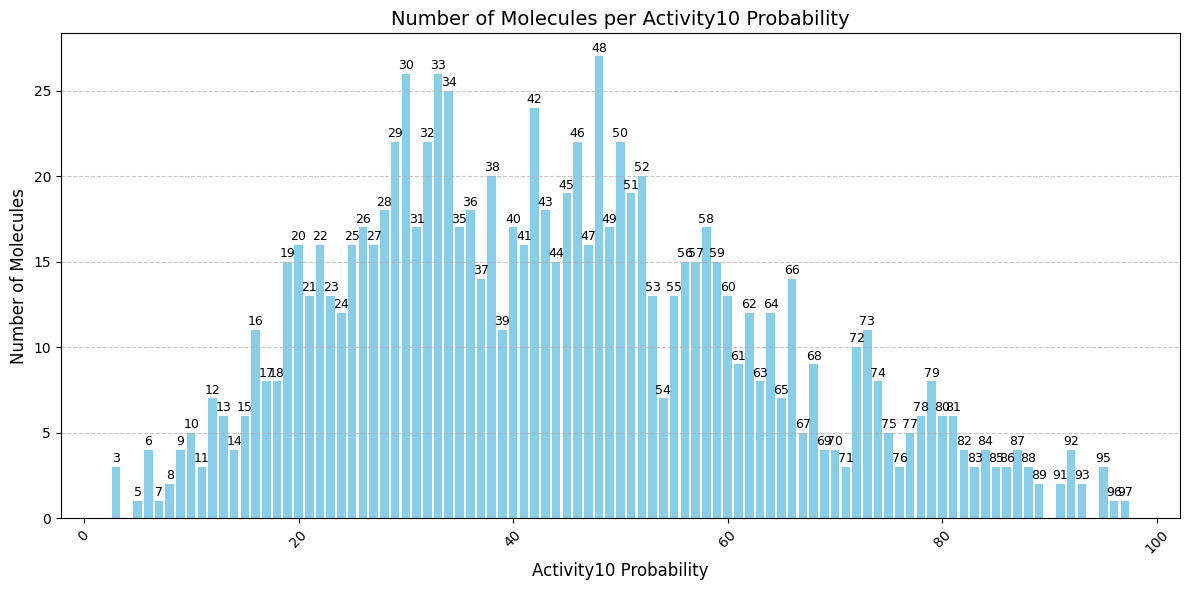

In [16]:
grouped_eos30gr_output = eos30gr_output.groupby('activity10').size().reset_index(name='count')


plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_eos30gr_output['activity10'], grouped_eos30gr_output['count'], color='skyblue')

for bar, activity10, count in zip(bars, grouped_eos30gr_output['activity10'], grouped_eos30gr_output['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{activity10}', 
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Activity10 Probability', fontsize=12)
plt.ylabel('Number of Molecules', fontsize=12)
plt.title('Number of Molecules per Activity10 Probability', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion
- The model has clearly shows a bais towards non-blockers and it's more likely to output it's a non-blocker 
- it's not a problem as the random sets contain more non-blockers and blockers may have a specific quality which only some molecules have in real world
